# 第14章聚类方法

1.聚类是针对给定的样本，依据它们属性的相似度或距离，将其归并到若干个“类”或“簇”的数据分析问题。一个类是样本的一个子集。直观上，相似的样本聚集在同类，不相似的样本分散在不同类。

2.距离或相似度度量在聚类中起着重要作用。

常用的距离度量有闵可夫斯基距离，包括欧氏距离曼哈顿距离、切比雪夫距离、、以及马哈拉诺比斯距离。常用的相似度度量有相关系数、夹角余弦。
用距离度量相似度时，距离越小表示样本越相似；用相关系数时，相关系数越大表示样本越相似。

3.类是样本的子集，比如有如下基本定义：
用$G$表示类或簇，用$x_i$,$x_j$；等表示类中的样本，用$d_{ij}$表示样本$x_i$与样本$x_j$之间的距离。如果对任意的$x _ { i } , x _ { j } \in G$，有$$d _ { i j } \leq T$$
则称$G$为一个类或簇。

描述类的特征的指标有中心、直径、散布矩阵、协方差矩阵。

4.聚类过程中用到类与类之间的距离也称为连接类与类之间的距离包括最短距离、最长距离、中心距离、平均距离。

5.层次聚类假设类别之间存在层次结构，将样本聚到层次化的类中层次聚类又有聚合或自下而上、分裂或自上而下两种方法。

聚合聚类开始将每个样本各自分到一个类；之后将相距最近的两类合并，建立一个新的类，重复此操作直到满足停止条件；得到层次化的类别。分裂聚类开始将所有样本分到一个类；之后将已有类中相距最远的样本分到两个新的类，重复此操作直到满足停止条件；得到层次化的类别。

聚合聚类需要预先确定下面三个要素：

（1）距离或相似度；
（2）合并规则；
（3）停止条件。

根据这些概念的不同组合，就可以得到不同的聚类方法。

6.$k$均值聚类是常用的聚类算法，有以下特点。基于划分的聚类方法；类别数k事先指定；以欧氏距离平方表示样本之间的距离或相似度，以中心或样本的均值表示类别；以样本和其所属类的中心之间的距离的总和为优化的目标函数；得到的类别是平坦的、非层次化的；算法是迭代算法，不能保证得到全局最优。

$k$均值聚类算法，首先选择k个类的中心，将样本分到与中心最近的类中，得到一个聚类结果；然后计算每个类的样本的均值，作为类的新的中心；重复以上步骤，直到收敛为止。

### 层次聚类 

1. **聚合**（自下而上）：聚合法开始将每个样本各自分裂到一个类，之后将相距最近的两类合并，建立一个新的类，重复次操作知道满足停止条件，得到层次化的类别。

2. **分裂**（自上而下）： 分裂法开始将所有样本分到一个类，之后将已有类中相距最远的样本分到两个新的类，重复此操作直到满足停止条件，得到层次化的类别。


### k均值聚类

k均值聚类是基于中心的聚类方法，通过迭代，将样本分到k个类中，使得每个样本与其所属类的中心或均值最近，得到k个平坦的，非层次化的类别，构成对空间的划分。

In [1]:
# 导入所需要的库或者类
import math
import random
import numpy as np
from sklearn import datasets,cluster
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
# 加载数据集

In [3]:
# 将目标列赋值给变量gt
gt = iris['target'];gt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

3类

In [4]:
# 通过使用 "iris['data']"，我们可以获取所有特征列的数据
# 使用切片操作 "[:,:2]"，选择了前两列的数据，即花萼长度和花萼宽度。切片操作中的 ":" 表示选择所有行，"2" 表示选择前两列
# 使用 ".shape" 获取切片后的数据的形状，返回一个元组，元组中的第一个元素表示数据的行数，第二个元素表示数据的列数
iris['data'][:,:2].shape

(150, 2)

In [5]:
# 从名为 "iris" 的数据集中提取 "data" 列，并选择该列中的前两列进行切片操作。然后将切片后的数据赋值给变量 "data"
data = iris['data'][:,:2]

In [6]:
# 将第一列第二列分别赋值
x = data[:,0]
y = data[:,1]

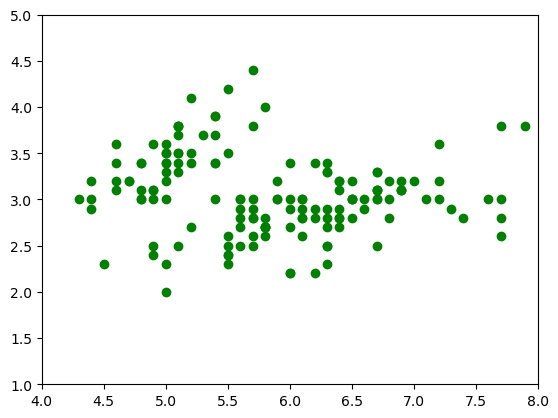

In [7]:
plt.scatter(x, y, color='green')        # 散点图
plt.xlim(4, 8)                          # 横轴范围
plt.ylim(1, 5)                          # 纵轴范围
plt.show()

In [8]:
# 定义聚类数的节点

class ClusterNode:
    def __init__(self, vec, left=None, right=None, distance=-1, id=None, count=1):
        """
        :param vec: 保存两个数据聚类后形成新的中心
        :param left: 左节点
        :param right:  右节点
        :param distance: 两个节点的距离
        :param id: 用来标记哪些节点是计算过的
        :param count: 这个节点的叶子节点个数
        """
        self.vec = vec
        self.left = left
        self.right = right
        self.distance = distance
        self.id = id
        self.count = count

In [9]:
def euler_distance(point1: np.ndarray, point2: list) -> float:
    # 两个参数，point1为numpy数组，point2是列表
    """
    计算两点之间的欧拉距离，支持多维
    """
    distance = 0.0                      # 初始化
    for a, b in zip(point1, point2):    # 迭代
        distance += math.pow(a - b, 2)  # 累加
    return math.sqrt(distance)          # 欧拉距离

In [10]:
# 层次聚类（聚合法）

class Hierarchical:
    def __init__(self, k):      # 初始化函数,k表示最终期望的聚类数量
        self.k = k
        self.labels = None
        
    def fit(self, x):           # 训练函数
        nodes = [ClusterNode(vec=v, id=i) for i, v in enumerate(x)]
        # for i, v in enumerate(x)遍历列表 x 的元素，并将每个元素的索引赋值给 i，将元素的值赋值给 v
        # 使用 ClusterNode 类创建了一个新的节点实例，并将其添加到列表中
        distances = {}          # 初始化一个空字典 distances 用于保存节点之间的欧拉距离
        point_num, feature_num = x.shape        # 获取数据集的行数和特征数
        # 初始化 labels 列表，将其长度设置为数据集的行数，初始值设为 -1。该列表将用于存储最终的聚类标签
        # [value] * n 是一种创建包含重复元素的列表的方法，其中 value 是要重复的元素，n 是重复的次数。这样会生成一个包含 n 个重复元素的列表
        self.labels = [-1] * point_num
        currentclustid = -1                     # 用于给新的聚类节点分配 ID
        while(len(nodes)) > self.k:
            min_dist = math.inf                 # 初始化变量 min_dist 为正无穷大
            nodes_len = len(nodes)              # 获取节点列表的长度
            closest_part = None                 # 初始化变量 closest_part 为 None
            # 每对节点的索引 (i, j)，其中 i 的范围是从 0 到节点列表长度减 1，j 的范围是从 i+1 到节点列表长度
            for i in range(nodes_len - 1):
                for j in range(i+1, nodes_len):
                    d_key = (nodes[i].id, nodes[j].id)      # 构建一个二元组 (i, j) 作为距离字典 distances 的键 d_key
                    if d_key not in distances:
                        # 计算节点 nodes[i] 和 nodes[j] 之间的欧拉距离，并将其存储在 distances 字典中
                        distances[d_key] = euler_distance(nodes[i].vec, nodes[j].vec)
                    d = distances[d_key]
                    if d < min_dist:
                        # 更新 min_dist 和 closest_part
                        min_dist = d
                        closest_part = (i, j)
                        
            part1, part2 = closest_part     # 获取距离最小的节点对的索引
            node1, node2 = nodes[part1], nodes[part2]       # 根据索引获取节点
            # 新节点的向量是根据两个节点的向量加权平均计算得到的，权重由节点的叶子节点个数决定
            new_vec = [ (node1.vec[i] * node1.count + node2.vec[i] * node2.count ) / (node1.count + node2.count)
                        for i in range(feature_num)]
            # 创建一个新的聚类节点 new_node，其中包括向量 new_vec、左子节点 node1、右子节点 node2、节点之间的距离 min_dist、ID currentclustid 和叶子节点个数之和
            new_node = ClusterNode(vec=new_vec,
                                   left=node1,
                                   right=node2,
                                   distance=min_dist,
                                   id=currentclustid,
                                   count=node1.count + node2.count)
            # 更新 currentclustid，使其递减
            currentclustid -= 1
            # 从节点列表中删除合并的节点，即删除 nodes[part2] 和 nodes[part1]
            del nodes[part2], nodes[part1]
            # 将新节点 new_node 添加到节点列表 nodes 中
            nodes.append(new_node)
        # 将节点列表 nodes 赋值给类的属性 self.nodes
        self.nodes = nodes
        # 调用 calc_label() 方法计算聚类结果
        self.calc_label()
        
    def calc_label(self):
        """
        调取聚类的结果
        """
        # 遍历聚类树中的所有节点，并为每个叶子节点分配相应的标签
        for i, node in enumerate(self.nodes):
            # 将节点的所有叶子节点都分类
            self.leaf_traversal(node, i)

    # 递归函数，用于递归遍历叶子节点。
    # 如果给定的节点是叶子节点（即没有左子节点和右子节点），则将该节点的 ID 对应的标签设为指定的 label 值。
    # 如果节点有左子节点或右子节点，则分别递归调用 leaf_traversal 方法
    def leaf_traversal(self, node: ClusterNode, label):
        """
        递归遍历叶子节点
        """
        if node.left == None and node.right == None:
            self.labels[node.id] = label
        if node.left:
            self.leaf_traversal(node.left, label)
        if node.right:
            self.leaf_traversal(node.right, label)
            
# https://zhuanlan.zhihu.com/p/32438294

In [11]:
my = Hierarchical(3)                # 创建一个 Hierarchical 类的实例 my，并指定期望的聚类数量为 3
my.fit(data)                        # 调用 fit 方法，对数据集 data 进行聚类
labels = np.array(my.labels)        # 将聚类标签 my.labels 转换为一个 NumPy 数组，并将其存储在变量 labels 中。这样可以方便地对标签进行进一步的处理和分析
print(labels)                       # 打印输出聚类标签

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 1 0 0 1 2 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


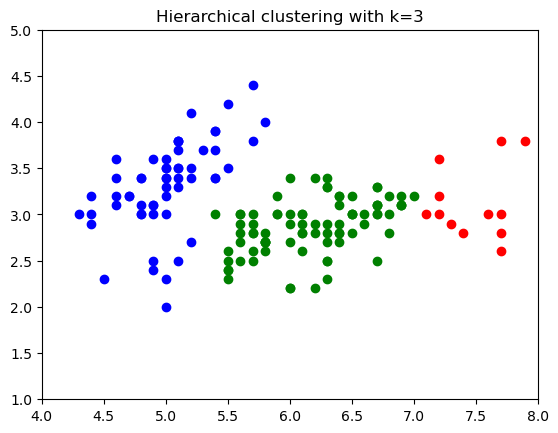

In [12]:
# visualize result

# 从数据集 data 中选择标签为 0、1、2 的数据点，并将它们存储在 cat1、cat2、cat3 中
cat1 = data[np.where(labels==0)]
cat2 = data[np.where(labels==1)]
cat3 = data[np.where(labels==2)]

# 散点图
plt.scatter(cat1[:,0], cat1[:,1], color='green')
plt.scatter(cat2[:,0], cat2[:,1], color='red')
plt.scatter(cat3[:,0], cat3[:,1], color='blue')
# 标题
plt.title('Hierarchical clustering with k=3')
# x、y轴范围
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

In [13]:
sk = cluster.AgglomerativeClustering(3)     # 创建一个 AgglomerativeClustering 类的实例 sk，并指定期望的聚类数量为 3
sk.fit(data)            # 调用 fit 方法，对数据集 data 进行聚类
labels_ = sk.labels_    # 将聚类标签保存在变量 labels_ 中
print(labels_)          # 打印输出聚类标签

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 1 0 1 1 0 2 0 2 0 2 2 2 2 0 0 2 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 1 2 2 2 0 1 2 0 2 0 0 0 0 1 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0]


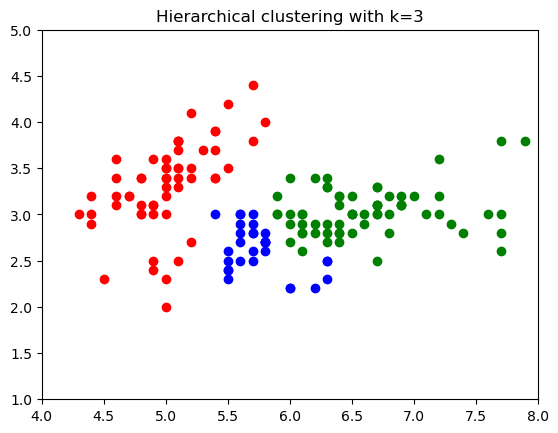

In [14]:
# visualize result of sklearn

# 从数据集 data 中选择 scikit-learn 聚类结果标签为 0、1、2 的数据点，并将它们存储在 cat1_、cat2_、cat3_ 中
cat1_ = data[np.where(labels_==0)]
cat2_ = data[np.where(labels_==1)]
cat3_ = data[np.where(labels_==2)]

# 散点图
plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
# 标题
plt.title('Hierarchical clustering with k=3')
# x、y轴范围
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

---------------------------------------------------------------------------------------------------------------------------------

In [15]:
# kmeans

class MyKmeans:
    def __init__(self, k, n=20):            # 构造函数
        self.k = k      # 聚类数量
        self.n = n      # 迭代次数
        
    def fit(self, x, centers=None):
        # 第一步，随机选择 K 个点, 或者指定
        if centers is None:
            # 由函数实现生成随机数组，长度为self.k，每个元素的值在 [0, len(x)) 范围内随机取值
            idx = np.random.randint(low=0, high=len(x), size=self.k)
            centers = x[idx]
        #print(centers)
        
        inters = 0
        while inters < self.n:
            #print(inters)
            #print(centers)
            # 创建一个空字典存储每个聚类中心对应的样本集合。
            # 键为聚类中心的索引，值为空列表
            points_set = {key: [] for key in range(self.k)}

            # 第二步，遍历所有点 P，将 P 放入最近的聚类中心的集合中
            for p in x:
                # 计算样本p与所有聚类中心的欧氏距离
                # 使用 np.argmin 找到距离最小的聚类中心的索引
                nearest_index = np.argmin(np.sum((centers - p) ** 2, axis=1) ** 0.5)
                # 将样本 p 添加到 points_set[nearest_index] 对应的样本集合中
                points_set[nearest_index].append(p)

            # 第三步，遍历每一个点集，计算新的聚类中心
            for i_k in range(self.k):
                centers[i_k] = sum(points_set[i_k])/len(points_set[i_k])
                
            inters += 1

        
            
        return points_set, centers
        

In [17]:
m = MyKmeans(3)     # 创建一个 MyKmeans 类的实例 m，并指定期望的聚类数量为 3
points_set, centers = m.fit(data)

In [18]:
centers

array([[5.006     , 3.428     ],
       [5.77358491, 2.69245283],
       [6.81276596, 3.07446809]])

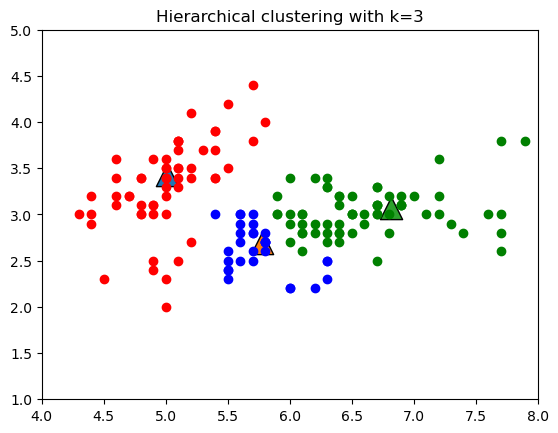

In [19]:
# visualize result

cat1 = np.asarray(points_set[0])
cat2 = np.asarray(points_set[1])
cat3 = np.asarray(points_set[2])

for ix, p in enumerate(centers):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('Hierarchical clustering with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

In [20]:
# using sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100).fit(data)
gt_labels__ = kmeans.labels_
centers__ = kmeans.cluster_centers_

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
gt_labels__

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [22]:
centers__

array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])

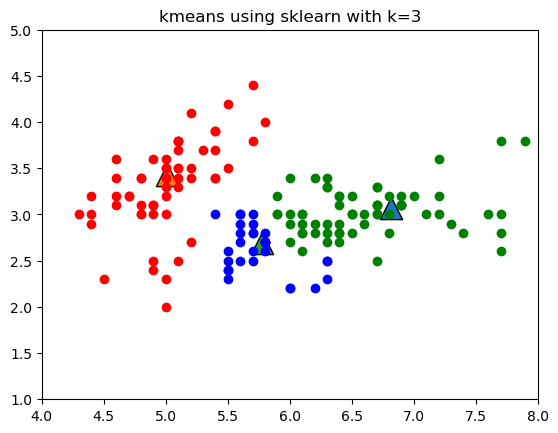

In [23]:
# visualize result

cat1 = data[gt_labels__ == 0]
cat2 = data[gt_labels__ == 1]
cat3 = data[gt_labels__ == 2]

for ix, p in enumerate(centers__):
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green')
plt.scatter(cat2_[:,0], cat2_[:,1], color='red')
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue')
plt.title('kmeans using sklearn with k=3')
plt.xlim(4, 8)
plt.ylim(1, 5)
plt.show()

#### 寻找 K 值

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


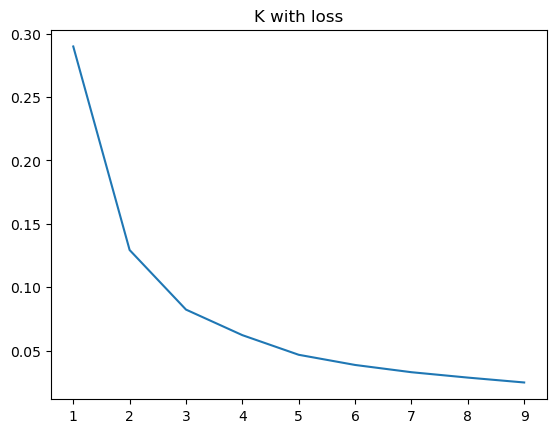

In [24]:
from sklearn.cluster import KMeans

loss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100).fit(data)
    loss.append(kmeans.inertia_ / len(data) / 3)

plt.title('K with loss')
plt.plot(range(1, 10), loss)
plt.show()

##### 例 14.2

In [25]:
X = [[0, 2], [0, 0], [1, 0], [5, 0], [5, 2]]

In [26]:
np.asarray(X)

array([[0, 2],
       [0, 0],
       [1, 0],
       [5, 0],
       [5, 2]])

In [27]:
m = MyKmeans(2, 100)                        # 创建一个 MyKmeans 类的实例，指定 K 值为 2，最大迭代次数为 100
points_set, centers = m.fit(np.asarray(X))  # 调用 MyKmeans 类的 fit 方法进行聚类

In [28]:
points_set      # 获取索引

{0: [array([0, 2]), array([0, 0]), array([1, 0])],
 1: [array([5, 0]), array([5, 2])]}

In [29]:
centers         # 中心点坐标

array([[0, 0],
       [5, 1]])

In [30]:
kmeans = KMeans(n_clusters=2, max_iter=100).fit(np.asarray(X))
# 创建了一个 KMeans 类的实例，并指定了聚类的 K 值为 2（即要分成 2 个簇），最大迭代次数为 100
# 调用 KMeans 类的 fit 方法来拟合数据

d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
kmeans.labels_
# 聚类簇标签 

array([1, 1, 1, 0, 0])

In [32]:
kmeans.cluster_centers_     # 中心点坐标

array([[5.        , 1.        ],
       [0.33333333, 0.66666667]])

----
本章代码来源：https://github.com/hktxt/Learn-Statistical-Learning-Method

本文代码更新地址：https://github.com/fengdu78/lihang-code

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)